## ISYE 6740 - Machine Learning

#### Graham Billey - Homework 7

### 1. Random Forest for email spam classifier.

The task is to build a spam classifier using the UCR email spam dataset found here: https://archive.ics.uci.edu/ml/datasets/Spambase

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


In [58]:
spam_data = pd.read_csv('spambase.data', header=None)
spam_data.rename(columns={57:'Indicator'}, inplace=True)

data = spam_data.values
X = data[:, :-1]
y = data[:, -1]


In [60]:
spam_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Indicator
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**1. How many instances of spam versus regular emails are there in the data? How many datapoints are there? How many features are there?**

In [61]:
print(f'There are {sum(spam_data["Indicator"] == 1)} spam emails and {sum(spam_data["Indicator"] == 0)} non-spam emails.\n')
print(f'There are {spam_data.shape[0]} total datapoints.\n')
print(f'There are {spam_data.shape[1]-1} features and 1 indicator variable in the data.\n')
      

There are 1813 spam emails and 2788 non-spam emails.

There are 4601 total datapoints.

There are 57 features and 1 indicator variable in the data.



**2. Build a classification tree model in Python. Show the tree in a plot.**

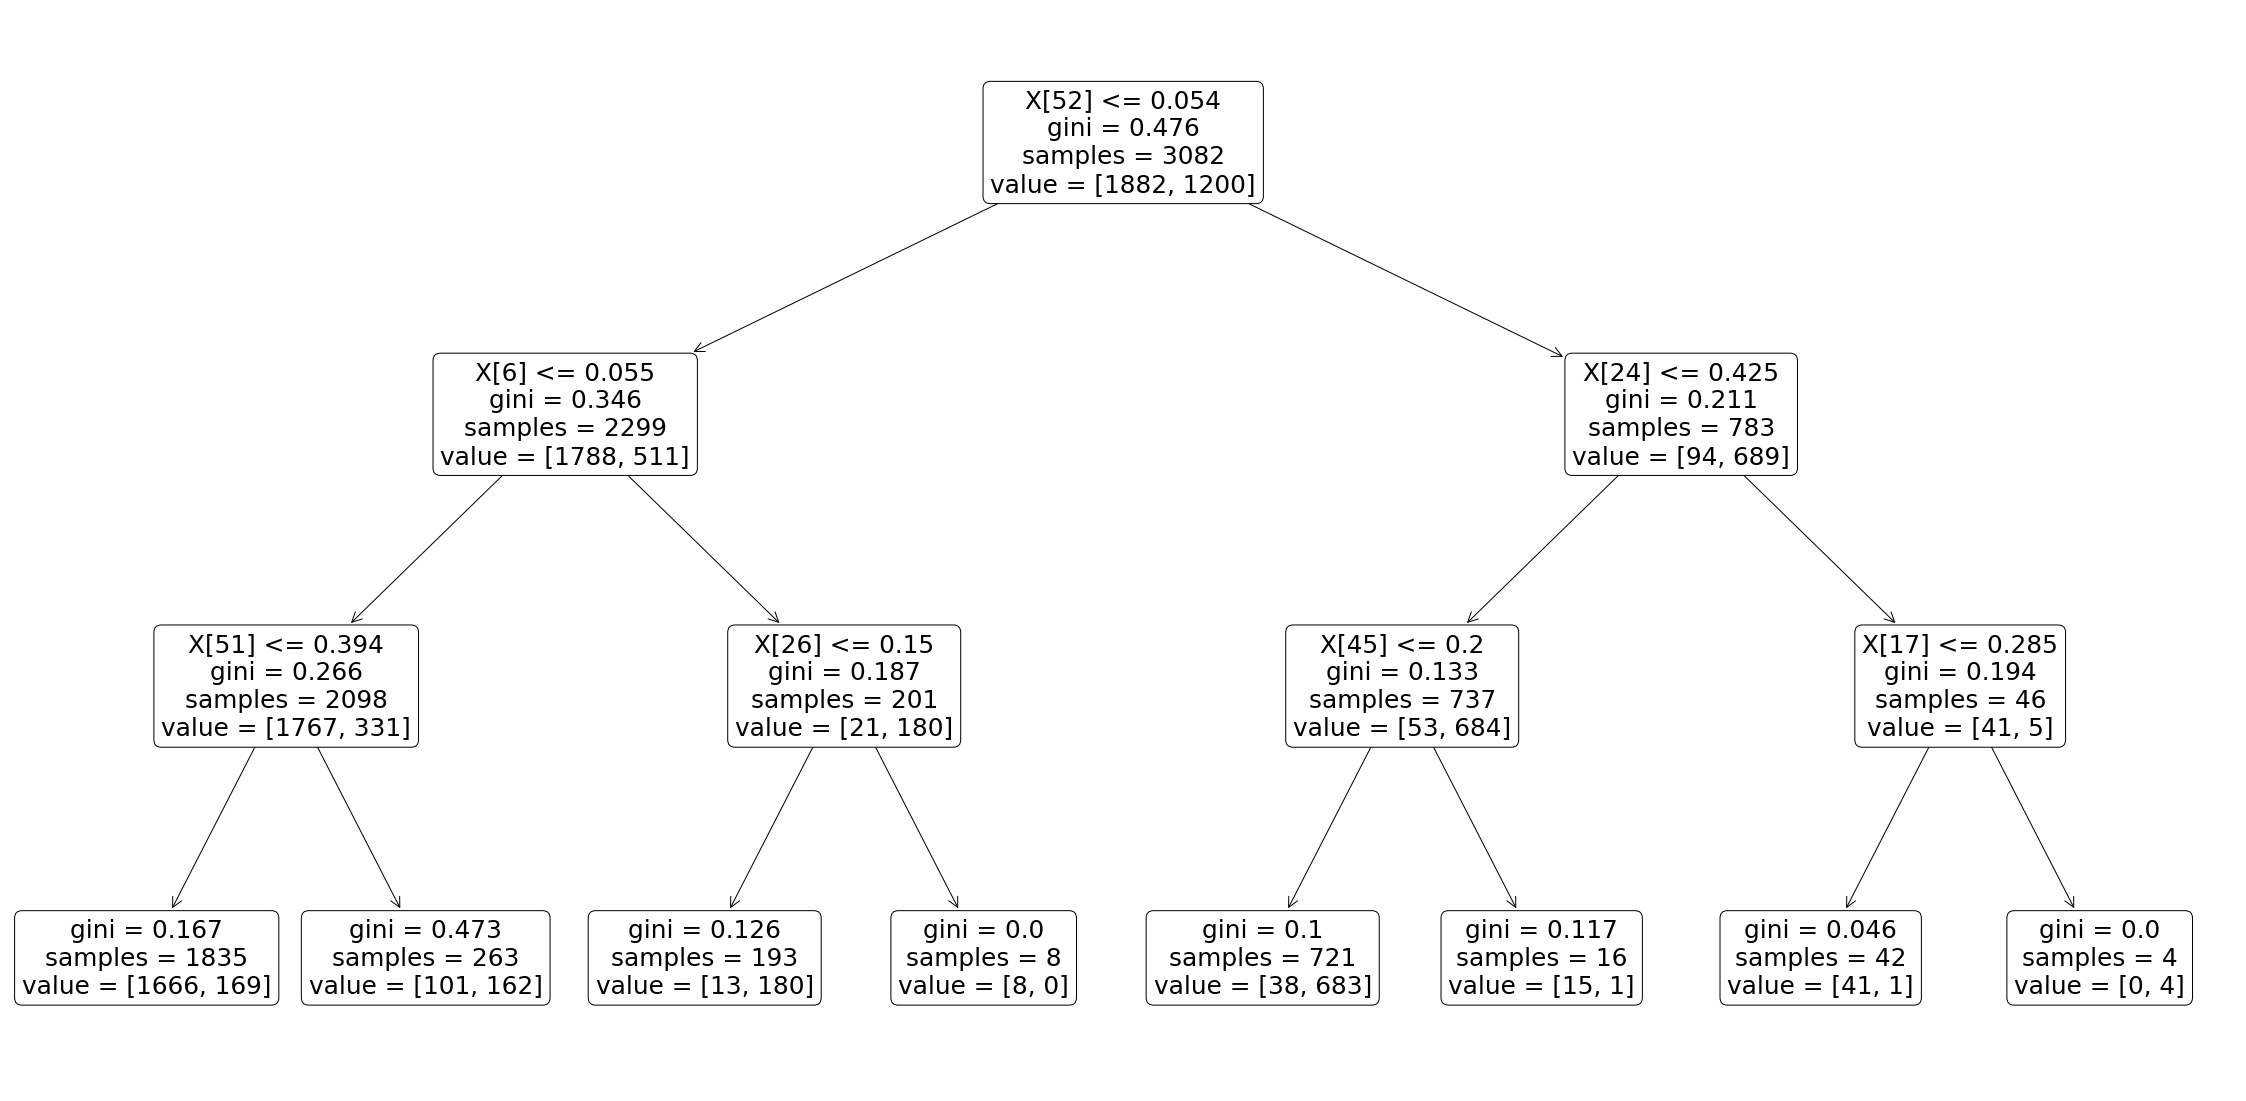

In [123]:
# Split data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Build classification tree.
tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
y_pred_tr = tree.predict(X_test)

# Plot classification tree.
plt.figure(figsize=(40,20))
plot_tree(tree, rounded=True)
plt.show()


A maximum depth of 3 was chosen so that the tree is legible. Adding more depth would produce a more accurate tree (on the training data), but it the image is too small to read.

**3. Build a random forest classifier. Compare the AUC for the classification decision tree and the random forest models on testing data. TO report the results, please try different tree sizes. Plot the curve of AUC versus tree size.**

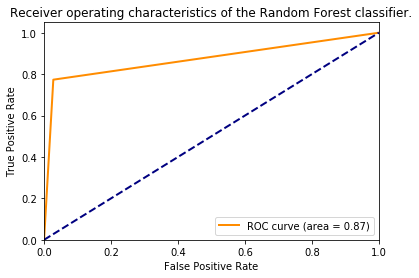

In [124]:
# Build a random forest classifier.
rf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=3).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Plot to AUC for the random forest classifier.
rf_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics of the Random Forest classifier.')
plt.legend(loc="lower right")
plt.show()

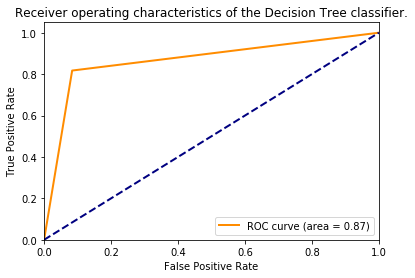

In [126]:
# Plot to AUC for the decision tree classifier.
tr_auc = roc_auc_score(y_test, y_pred_tr)
fpr_tr, tpr_tr, _tr = roc_curve(y_test, y_pred_tr)

plt.figure()
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % tr_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics of the Decision Tree classifier.')
plt.legend(loc="lower right")
plt.show()

In [156]:
ans=np.array([[0,0,0]])

# Calculate AUC for decicion tree and random forest classifiers of different sizes.
for m in range(1,20):
    # Decision Tree
    tree = DecisionTreeClassifier(random_state=0, max_depth=m).fit(X_train, y_train)
    y_pred_tr = tree.predict(X_test)
    tr_auc = roc_auc_score(y_test, y_pred_tr)


    # Random Forest
    rf = RandomForestClassifier(random_state=0, n_estimators=10, max_depth=m).fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_auc = roc_auc_score(y_test, y_pred_rf)

    new_scores = np.array([[m, tr_auc, rf_auc]])

    ans = np.append(ans, new_scores, axis=0)


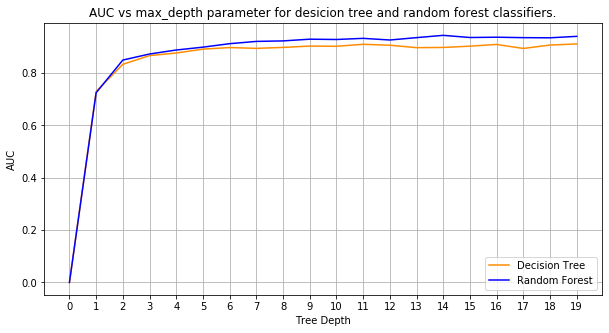

In [180]:
plt.figure(figsize=(10,5))
plt.plot(ans[:,0], ans[:,1], color='darkorange', label='Decision Tree')
plt.plot(ans[:,0], ans[:,2], color='blue', label='Random Forest')
plt.xlabel('Tree Depth')
plt.ylabel('AUC')
plt.title('AUC vs max_depth parameter for desicion tree and random forest classifiers.')
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(ans[:,0])
plt.show()

### 2. Nonlinear regression and cross-validation.

The coefficient of thermal expansion $y$ changes with temperature $x$. An experiment to relate $y$ to $x$ was done. Temperature was measured in degrees Kelvin. Below is an image of the results.

![](t_c.png)

In [399]:
# from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from statsmodels.api import add_constant
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [307]:
therm = pd.read_csv('copper-new.csv', header=None).values
y2 = therm[:,0]
x2 = therm[:,1]
x2 = add_constant(x2)

**1. Perform linear regression on the data. Report the fitted model and the fitting error.**

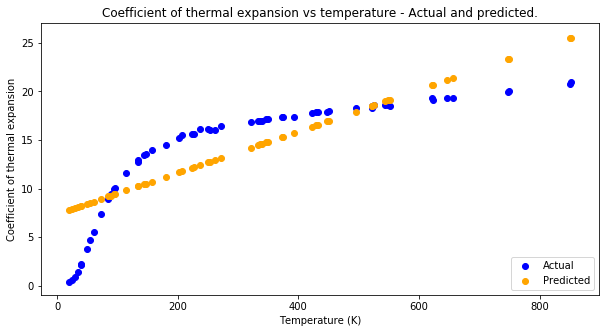

The parameters of the model are shown below.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     124.6
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           5.70e-16
Time:                        16:34:22   Log-Likelihood:                -153.14
No. Observations:                  59   AIC:                             310.3
Df Residuals:                      57   BIC:                             314.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [282]:
lr = OLS(y2,x2).fit()
y2_pred = lr.predict(x2)

plt.figure(figsize=(10,5))
plt.scatter(x2[:,1], y2, color='blue', label='Actual')
plt.scatter(x2[:,1], y2_pred, color='orange', label='Predicted')
plt.xlabel('Temperature (K)')
plt.ylabel('Coefficient of thermal expansion')
plt.title('Coefficient of thermal expansion vs temperature - Actual and predicted.')
plt.legend(loc="lower right")
plt.show()

print(f'The parameters of the model are shown below.\n\n{lr.summary()}')

print(f'\nThe mean squared fitting error of the model is {round(mean_squared_error(y2, y2_pred),3)}.')

**2. Perform nonlinear regression with a polynomial regression function up to degree $n=10$ and use ridge regression. Write down your formulation and strategy for doing this.**

First, we can form the new dataset used for polynomial regression by calculating the variables $x^2, x^3, ... , x^{10}$. 


In [321]:
# Form the polynomial variables
x_col = x2[:,1].reshape(-1,1)
x_2 = x_col**2
x_3 = x_col**3
x_4 = x_col**4
x_5 = x_col**5
x_6 = x_col**6
x_7 = x_col**7
x_8 = x_col**8
x_9 = x_col**9
x_10 = x_col**10
x_poly = np.hstack((x2, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10))

# Split data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(x_poly, y2, test_size=0.33, random_state=1)

Next, we will perform OLS linear regression on the dataset in a loop. In each iteration of the loop, we will add another power of the `temperature` variable, and calculate the meas squared error on the test data. This will allow us to determine the best degree polynomial to use for ridge regression in the next step.

In [371]:
# Perform a linear regression on each degree polynomial
a = np.array([[0,0]])

for p in range(2,11):
    lr_poly = OLS(y_train,X_train[:,0:p]).fit()
    lr_poly_pred = lr_poly.predict(X_test[:,0:p])
    lr_poly_mse = mean_squared_error(y_test, lr_poly_pred)

    new_scores = np.array([[p, lr_poly_mse]])
    a = np.append(a, new_scores, axis=0)
    
a = a[1:,:] # Drop unneeded first row of a
print(a)

[[ 2.          7.19047338]
 [ 3.          5.0040196 ]
 [ 4.          1.39053891]
 [ 5.          0.28395149]
 [ 6.          0.06426833]
 [ 7.          1.99752652]
 [ 8.         15.7093339 ]
 [ 9.         38.2834555 ]
 [10.         53.9488199 ]]


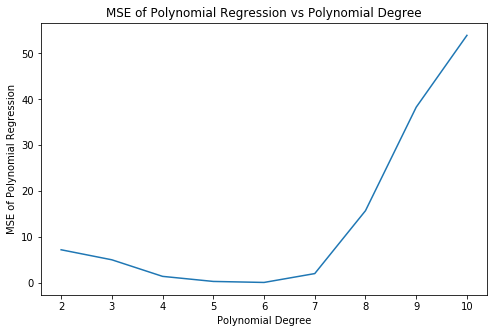

In [370]:
plt.figure(figsize=(8,5))
plt.plot(a[:,0], a[:,1])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE of Polynomial Regression')
plt.title('MSE of Polynomial Regression vs Polynomial Degree')
plt.show()

**Based on the analysis above, the polynomial of degree 6 appears to work the best. As the polynomial degree increases, you can see it overfitting the training data and performing poorly on the test data.**

For ridge regression, we want to include a regularization term to ensure the weights applied to each variable are constrained. 

Then, the optimization problem we are trying to solve becomes:

$$ \theta^r = argmin_\theta L(\theta) = \frac{1}{m} \sum_{i=1}^m (y^i - \theta^T x^i)^2 + \lambda \, ||\theta||^2 $$


**3. Use 5-fold cross validation to select the optimal regularization parameter $\lambda$. Plot the cross validation curve and report the optimal $\lambda$.**

In [411]:
# Set up the ridge regression
Rr = RidgeCV(alphas=(0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000), normalize=True, store_cv_values=True)
Rr_fit = Rr.fit(X_train[:,0:6], y_train)


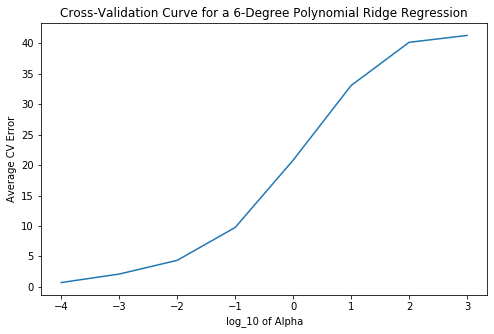

In [415]:
plt.figure(figsize=(8,5))
plt.plot(np.log(Rr_fit.alphas)/np.log(10), np.average(Rr_fit.cv_values_, axis=0))
plt.xlabel('log_10 of Alpha')
plt.ylabel('Average CV Error')
plt.title('Cross-Validation Curve for a 6-Degree Polynomial Ridge Regression')
plt.show()

The optimal lambda in this case is the smallest one tested : $\lambda = 0.0001$.

**4. Predict the coefficient at 400 K using both models. Comment on how you would compare the accuracy of predictions.**

In [447]:
linear_400K_pred = lr.predict(new_x[0:2])
ridge_400K_pred  = Rr_fit.predict(new_x[0:6].reshape(1,-1))

print(f'The coefficient of thermal expansion predicted with simple linear regression is {linear_400K_pred}.\n')
print(f'The coefficient of thermal expansion predicted with polynomial ridge regression is {ridge_400K_pred}.\n')


The coefficient of thermal expansion predicted with simple linear regression is [15.89738509].

The coefficient of thermal expansion predicted with polynomial ridge regression is [17.97924663].



Looking at the data itself, the OLS prediction appears to be too low. The polynomial regression looks much closer to the data itself.

### 3. Regression, bias-variance tradeoff.

![](3a.png)

**1. Find the closed form solution for $\hat\beta$ and its distribution.**

The following is taken directly from the lecture slides. $\theta^r$ is the closed form solution to the above optimization.

The distribution of $\hat \beta$ is Gaussian, since an affine transformation of a Gaussian distribution is also Gaussian.

![](3b.png)

**2. Calculate the bias $ E[x^T \hat\beta(\lambda)] - x^T \beta^* $ as a function of $\lambda$ and some fixed test point $x$.**

$$ \large E[\hat\beta(\lambda)] - \beta^* = $$

$$ \large = E\,[\,(X X^T + \lambda I)^{-1} X y\,] - \beta^*  $$

$$ \large = (X X^T + \lambda I)^{-1} X \, E[y] - \beta^*  $$

$$ \large = (X X^T + \lambda I)^{-1} XX^T \beta^* - \beta^*  $$

Plugging back in the test point $x$...

$$ \large = x^T(X X^T + \lambda I)^{-1} XX^T \beta^* - x^T\beta^*  $$

**3. Calculate the variance term $ \large E[(x^T \hat\beta(\lambda) - E[x^T \hat\beta])^2] $ as a function of $\lambda$ and some fixed test point $x$.**

Let us define $\large W_\lambda = (XX^T + \lambda I)^{-1} XX^T$

Then the ridge estimator $ \large \hat\beta(\lambda)$ can be expressed as: $ \large W_\lambda \hat\beta = \hat\beta(\lambda) $

The linear operator $\large W_\lambda$ transforms the OLS estimator of the regression parameter into the ridge estimator.

Now we can calculate the variance $\large E[(x^T \hat\beta(\lambda) - E[x^T \hat\beta])^2] $ as: 

$$ \large Var[\hat\beta(\lambda)] =  $$

$$ \large = Var[W_\lambda \hat\beta] $$

$$ \large = W_\lambda Var[ \hat\beta] W_\lambda^T $$

$$ \large = \sigma^2 (XX^T + \lambda I)^{-1} XX^T [(XX^T + \lambda I)^{-1}]^T $$

**4. Use the results from parts (b) and (c) and the bias-variance decomposition to analyze the impact of $\lambda$ on the squared error. Specifically, which term dominates when $\lambda$ is small, and which term dominates when $\lambda$ is large?**

MSE = Bias$^2$ + Variance

**When $\lambda$ is large, variance goes to 0 and bias dominates.** Looking at the variance term above, we can see that ir is proportional to $(1 + \lambda)^2$. 

**When $\lambda$ is small, bias goes goes to 0 and variance dominates.** Since $\lambda \geq 0$, $\lambda = 0$ is the smallest $\lambda$ value possible. This means the Ridge regression is equivalent to the OLS regression. We know that the OLS estimator for $\beta^*$ is unbiased.